In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val
from src.homps import homps
from src.hops import hops

In [3]:
# parameters for the bath correlation functions
gs = np.array([[0.01, 0.01, 0.01, 0.01], [0.1, 0.1, 0.1, 0.1], [1, 1, 1, 1], [10, 10, 10, 10], [100, 100, 100, 100]])
w = np.array([0.5+2j, 0.5+2j, 0.5+2j, 0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

# Try:
# 1. Turn on the noise
# 2. Try exact computations

In [13]:
N_steps = 100
N_trunc = 8
g = gs[0]
use_noise = False

options_cbe = {
    'linear' : False,
    'use_noise' : use_noise,
    'method' : 'CBETDVP',
    'chi_max' : 20,
    'eps' : 1.e-15,
    'D_max' : 20,
    'D_tilde': 1,
    'truncation_threshold': 1e-5,
    'health_check_threshold': 1e-10,
    'enable_orthogonalization': False
}

options_2 = {
    'linear' : False,
    'use_noise' : use_noise,
    'method' : 'TDVP2',
    'chi_max' : 20,
    'eps' : 1.e-15
}

In [14]:
print("With noise:")
print("Calculating g = " + str(g[0]))
start_cbe = time.time()
my_homps_cbe = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options_cbe)
psis_cbe = my_homps_cbe.compute_realizations(1)
sigma_zs_cbe = compute_exp_val(psis_cbe, sigma_z)
end_cbe = time.time()
elapsed_time_cbe = end_cbe - start_cbe
print("Elapsed time: ", str(elapsed_time_cbe))

With noise:
Calculating g = 0.01
Using CBE-TDVP
Length:  5
1e-05
Steps: 0
Health check of preselected A: 2.528772284819897e-17
Health check of preselected A: 5.006713685883697e-17
Health check of preselected A: 1.9951971378938164e-17
Health check of preselected A: 4.163336342344337e-17
Steps: 1
Health check of preselected A: 1.3658999938569171e-14
Health check of preselected A: 9.026027144164017e-15
Health check of preselected A: 1.712245555799655e-14
Skip shrewd selection as all indices are zero
Steps: 2
Health check of preselected A: 1.2524320818396123e-13
Health check of preselected A: 2.2953916285106206e-13
Health check of preselected A: 2.020262819140208e-13
Skip shrewd selection as all indices are zero
Steps: 3
Health check of preselected A: 4.636793828465362e-14
Health check of preselected A: 3.1789692324005675e-13
Health check of preselected A: 1.2433350901570467e-12
Skip shrewd selection as all indices are zero
Steps: 4
Health check of preselected A: 2.526423428581685e-13
Heal

In [25]:
print(my_homps_cbe.average_bond_dimensions)


[1.0, 2.0, 2.75, 3.5, 4.25, 5.0, 5.75, 6.5, 6.75, 7.0, 7.25, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5]


AttributeError: 'HOMPS_Engine' object has no attribute 'get_bond_dim'

In [18]:
print("Calculating g = " + str(g[0]))
start_2 = time.time()
my_homps_2 = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options_2)
psis_2 = my_homps_2.compute_realizations(1)
sigma_zs_2 = compute_exp_val(psis_2, sigma_z)
end_2 = time.time()
elapsed_time_2 = end_2 - start_2
print("Elapsed time: ", str(elapsed_time_2))

Calculating g = 1.0
Using TDVP2
Length:  5
Steps: 0
Steps: 1
Steps: 2


: 

In [15]:
# average_bond_dimensions_2 = my_homps_2.average_bond_dimensions
average_bond_dimensions_cbe = my_homps_cbe.average_bond_dimensions

In [18]:
psis_2 = np.load(f"../../output/{str(g[0])}/no-noise/tdvp2_psi.npy")
# psis_cbe = np.load(f"../../output/{str(g[0])}/noise/1b177b9d-6c12-4058-945c-29ee133e9aa0/cbetdvp_psi.npy")
average_bond_dimensions_2 = np.load(f"../../output/{str(g[0])}/no-noise/tdvp2_avg_bond_dim.npy")
# average_bond_dimensions_cbe = np.load(f"../../output/{str(g[0])}/noise/1b177b9d-6c12-4058-945c-29ee133e9aa0/cbetdvp_avg_bond_dim.npy")


In [19]:
sigma_zs_2 = compute_exp_val(psis_2, sigma_z)
sigma_zs_cbe = compute_exp_val(psis_cbe, sigma_z)


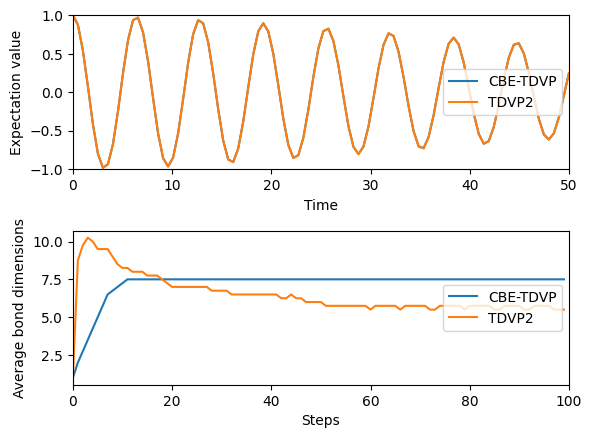

In [20]:
fig, axs = plt.subplots(2)

axs[0].plot(np.linspace(0, duration, N_steps), sigma_zs_cbe, "-", label="CBE-TDVP")
axs[1].plot(range(0, N_steps), average_bond_dimensions_cbe, "-", label="CBE-TDVP")
axs[0].plot(np.linspace(0, duration, N_steps), sigma_zs_2, "-", label="TDVP2")
axs[1].plot(range(0, N_steps), average_bond_dimensions_2, "-", label="TDVP2")
axs[0].legend(loc="center right")
axs[1].legend(loc="center right")
axs[0].set_ylim(-1, 1)
axs[0].set_xlim(0, duration)    
axs[1].set_xlim(0, N_steps)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Expectation value")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Average bond dimensions")
noise_title = "with noise" if use_noise else "without noise"
# fig.suptitle(f'Comparison between TDVP2 and CBE-TDVP\nwith g={g[0]} {noise_title}') 
fig.subplots_adjust(hspace=0.4)

In [9]:
import uuid
import os

id = str(uuid.uuid4())
noise_prefix = "noise" if use_noise else "no-noise"
prefix = f"../../output/{str(g[0])}/{noise_prefix}/{id}/"
os.makedirs(prefix, exist_ok=True)
g_param = "g=" + str(g[0]).replace('.', ',')
name_2 = "tdvp2_"
name_cbe = "cbetdvp_"
psi_name = "psi"
dim_name = "avg_bond_dim"

np.save(prefix + name_2 + psi_name, psis_2)
np.save(prefix + name_cbe + psi_name, psis_cbe)
np.save(prefix + name_2 + dim_name, average_bond_dimensions_2)
np.save(prefix + name_cbe + dim_name, average_bond_dimensions_cbe)
fig.savefig(prefix + "plot")

# with open("../output/" + name_2, 'wb') as f:
#     np.save(f, psis_2)
# with open("../output/" + name_cbe, 'wb') as f:
#     np.save(f, psis_cbe)


In [11]:
import json
with open('../../output/output.json', 'r', encoding='utf-8') as f:
    content = f.read()
    if content == '':
        data = {}
    else:
        data = json.loads(content)

data[g_param][noise_prefix][id] = {
    # "tdvp2_time": "{:.2f}".format(elapsed_time_2),
    "cbetdvp_time": "{:.2f}".format(elapsed_time_cbe),
    "truncation_threshold": options_cbe["truncation_threshold"],
    "health_check_threshold": options_cbe["health_check_threshold"],
    "chi_max": options_cbe["chi_max"],
    "eps": options_cbe["eps"],
    "D_max": options_cbe["D_max"],
    "D_tilde": options_cbe["D_tilde"],
    "enable_orthogonalization": options_cbe["enable_orthogonalization"]
}

with open('../../output/output.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=4)



In [18]:

# print("With noise:")
# options['use_noise'] = True
# for i, g in enumerate(gs):
#     print("Calculating g = " + str(g[0]))
#     my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
#     for i in range(3):
#         psis = my_homps.compute_realizations(1)
#         sigma_zs = compute_exp_val(psis, sigma_z)
#         plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-", label="g="+str(g[0]))

# plt.legend()
# plt.ylim(-1, 1)
# plt.xlim(0, duration)
# plt.show()
# TODO:
# 1. Plot the bond dimension increase
# 2. Try g=10 and g=100 until convergence (put in different sections)
# 3. Try the non-linear case
# 4. Increase chi_max (20)

In [8]:
# noise_average_bond_dimensions_2 = np.load(f"../../output/1.0/noise/tdvp2_avg_bond_dim.npy")
# noise_average_bond_dimensions_cbe = np.load(f"../../output/1.0/noise/cbetdvp_avg_bond_dim.npy")
no_noise_average_bond_dimensions_2 = np.load(f"../../output/1.0/no-noise/tdvp2_avg_bond_dim.npy")
no_noise_average_bond_dimensions_cbe = np.load(f"../../output/1.0/no-noise/cbetdvp_avg_bond_dim.npy")
print(len(no_noise_average_bond_dimensions_cbe))
# print(noise_average_bond_dimensions_cbe)
print(no_noise_average_bond_dimensions_2)
# print(noise_average_bond_dimensions_2)



100
[ 1.   11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5
 11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5
 11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5
 11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5  11.5
 11.5  11.5  11.25 11.25 11.25 11.25 11.25 11.25 11.25 11.   10.75 10.75
 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75
 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75
 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75 10.75
 10.75 10.75 10.75 10.75]
